In [39]:
import pandas as pd
!pip install twilio
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib
from twilio.rest import Client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.5 MB/s eta 0:00:00


In [62]:
# Initialize the Twilio client
client = Client(twilio_account_sid, twilio_auth_token)

In [20]:
# keywords = ['urgent', 'important', 'meeting','delivery','deducted','attachment']

In [23]:
# def label_email(row):
#     if any(keyword in row['text'].lower()for keyword in keywords):
#         return 'important'
#     else:
#         return 'not important'

In [24]:
# df['label'] = df.apply(label_email, axis=1)
# df.to_csv('updated_dataset.csv', index=False)

In [63]:
# Function to send an SMS alert
def send_sms_alert(subject, phone_number):
    client.messages.create(
        body=f"Important email received: {subject}",
        from_=twilio_phone_number,
        to=phone_number
    )


In [64]:
# Load your dataset
df = pd.read_csv('/content/updated_dataset.csv')

In [65]:
# Initialize the model and vectorizer
model = MultinomialNB()
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [66]:
# Function to update the model with user feedback
def update_model_with_feedback(email_text, label):
    # Vectorize the email text
    email_vector = tfidf_vectorizer.transform([email_text])

    # Update the model with user feedback
    model.partial_fit(email_vector, [label])

    # Save the updated model to a file
    joblib.dump(model, 'updated_model.pkl')

In [67]:
def classify_email(email_text):
    email_vector = tfidf_vectorizer.transform([email_text])
    label = model.predict(email_vector)
    return label[0]


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
# Load your dataset
df = pd.read_csv('updated_dataset.csv')

# Split the data into training and testing sets
X = df['text']  # Use the correct column name
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Vectorize the email text
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [79]:

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888


In [80]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[  6 106]
 [  9 914]]


In [81]:
# Create a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
               precision    recall  f1-score   support

    important       0.40      0.05      0.09       112
not important       0.90      0.99      0.94       923

     accuracy                           0.89      1035
    macro avg       0.65      0.52      0.52      1035
 weighted avg       0.84      0.89      0.85      1035



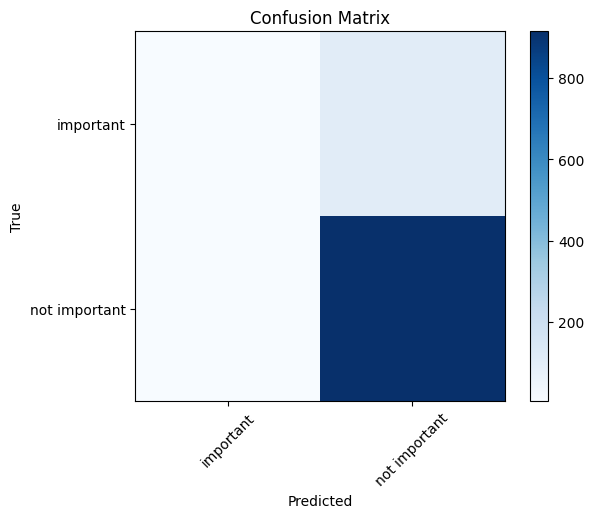

Classification: important


In [84]:
# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = [i for i in range(len(classes))]
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(confusion, classes=['important', 'not important'])

In [86]:
def main():
    # Example email text for testing
    email_text = "meeting ."

    label = classify_email(email_text)
    print(f"Classification: {label}")

    if label == 'important':
        user_feedback = "no"  #  user feedback
        if user_feedback == 'no':
            label = 'not important'
            update_model_with_feedback(email_text, label)
        else:
            # Send an SMS alert for important emails
            send_sms_alert("Important Email Alert", '+917447812325')
if __name__ == '__main__':
    main()


Classification: important
